
Laboratorio 06: Aprendizaje no supervisado - Agrupamiento (Clustering)
=========================================

David Cardenas Peña, PhD. 

Edificio de Ingeniería Eléctrica, Oficina 1B-131

email: dcardenasp@utp.edu.co

# Objetivos

*   Identificar las asunsiones de la técnicas de agrupamiento.
*   Aplicar técnicas de agrupamiento a un problema real.


In [147]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  make_moons, make_circles, make_blobs, load_digits, make_classification

In [148]:
#Bloque para definir los datasets:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

datasets = [X,X_aniso,X_varied,X_filtered]



#Actividad 1: 
Implemente la función de costo para el algoritmo k-means:

$J=\sum\limits_n\sum\limits_k{r_{nk}||x_n-\mu_k||^2}$

In [149]:
def cost(X,mu,R):
  #X.shape = (N,D)
  #mu.shape = (K,D)
  #R.shape = (N,K) binary

  J = 0
  for n in range(len(X)):
    for k in range(len(mu)):
      J += R[n][k]*np.linalg.norm(X[n,:] - mu[k,:])**2
  return J

#Actividad 2:

Implemente el paso 1 del algoritmo k-means:

$r_{nk}=\left\{\begin{array}{c,c}1& k=\text{argmin}_j{||x_n-\mu_j||}\\0 & \text{en otro caso}\end{array}\right.$

In [150]:
def compute_r(X,mu):
  #X.shape = (N,D)
  #mu.shape = (K,D)
  #R.shape = (N,K) binary
  N,D = X.shape
  K = mu.shape[0]
  R = np.zeros((N,K))
  l = []
  for n in range(X.shape[0]):
    l = []
    for k in range(mu.shape[0]):
      s = (np.linalg.norm(X[n] - mu[k]))
      l.append(s)
    k = np.argmin(l)
    R[n,k] = 1
  return R

R = compute_r(X,np.eye(2))
print(R.shape)

(1500, 2)


#Actividad 3:
Implemente el paso 2 del algoritmo k-means:

$\mu_k=\frac{\sum\limits_n{r_{nk}x_n}}{\sum\limits_n{r_{nk}}}$

In [151]:
def compute_mu(X,R):
  #X.shape = (N,D)  
  #R.shape = (N,K) binary
  #mu.shape = (K,D)

  N,D = X.shape
  K = R.shape[1]
  mu = np.zeros((K,D))
  dem = R.sum(0)  

  for k in range(mu.shape[0]):
    num = 0
    for n in range(X.shape[0]):
      num += R[n,k]*X[n]

    mu[k] = num / dem[k]  
  return mu

#Actividad 4:

Complete la función `update` que:

  1. Calcula $r_{nk}$ con $\mu_k$
  2. Calcula $\mu_k$ con $r_{nk}$
  3. Retorna $\mu_k$ y $r_{nk}$ actualizados

Use sus implementaciones de `compute_r` y `compute_mu`


In [152]:
def update(X,mu):
  #X.shape = (N,D)
  #mu.shape = (K,D)
  
  R = compute_r(X,mu)
  mu = compute_mu(X,R)
  
  return mu,R

#Actividad 5:

Implemente el algoritmo k-means:

1. Inicializar $\mu_k$ escogiendo $K$ filas aleatorias en $X$
2. Actualizar el modelo usando `update` durante `max_iter` iteraciones y parar si $r_{nk}$ no cambia de una iteración a otra.
3. Calcular el costo en cada iteración.
4. Retornar el costo en cada iteración (como una lista o vector), los centroides $\mu_k$, y las etiquetas $r_{nk}$.

In [153]:
def kmeans(X,K=2,max_iter=100):

  #mu = np.random.normal(size=(K,X.shape[1]))
  mu = X[np.random.permutation(X.shape[0])[:K]]
  #R = np.random.randint(2,size=(X.shape[0],K))
  J = np.zeros((max_iter,))

  for iter in range(max_iter):
    mu, R = update(X,mu)
    J[iter] = cost(X,mu,R)    
  
  return J,mu,R

#Actividad 6:

*   Ejecute el siguiente bloque que emplea su implementación para agrupar las bases de datos del laboratorio.
*   Cambie el número de grupos 
*   Identifique las dificultades del algoritmo



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


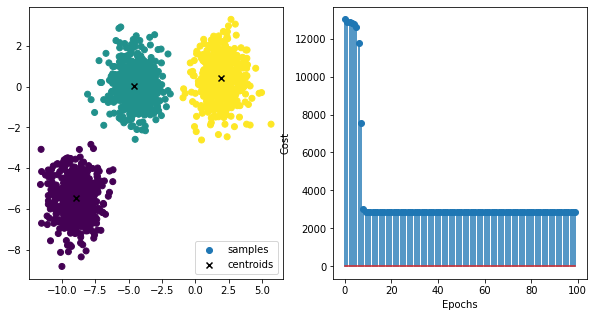

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


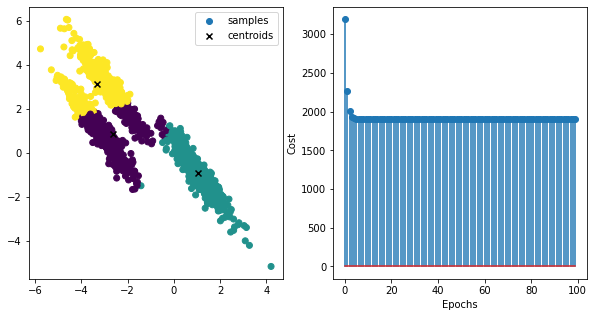

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


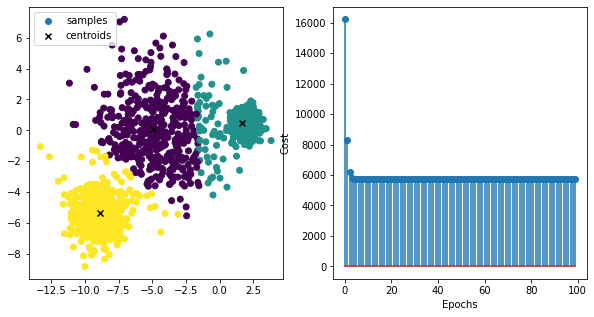

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


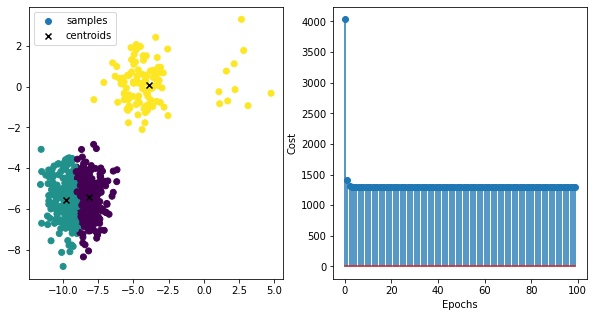

In [154]:
for X in datasets:
  
  J,mu,R = kmeans(X,K=3,max_iter=100)

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.scatter(X[:,0],X[:,1],c=np.argmax(R,1),label='samples')
  plt.scatter(mu[:,0],mu[:,1],c='k',marker='x',label='centroids')
  plt.legend()
  plt.subplot(1,2,2)
  plt.stem(J) 
  plt.ylabel('Cost') 
  plt.xlabel('Epochs')
  plt.show()

#Actividad 7:

* Consulte cómo usar el módulo k-means de scikit-learn
(`sklearn.cluster.KMeans`).

* Repita la Actividad 6 empleando la implementación de sklearn.


Text(0.5, 1.0, 'Número incorrecto de manchas')

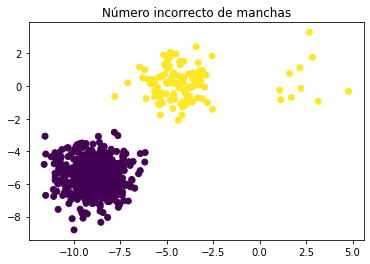

In [155]:
from sklearn.cluster import KMeans
 
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Número incorrecto de manchas")

Text(0.5, 1.0, 'Gotas distribuidas de forma anisotrópica')

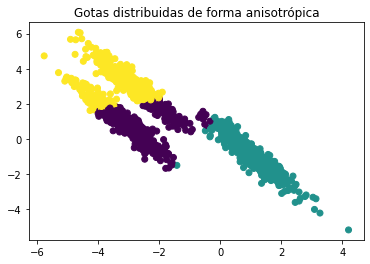

In [156]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot()
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Gotas distribuidas de forma anisotrópica")

Text(0.5, 1.0, 'Varianza desigual')

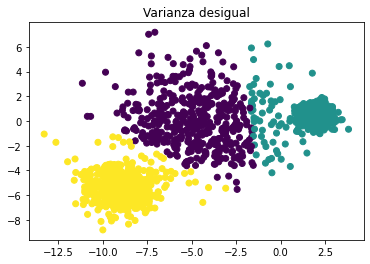

In [173]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot()
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Varianza desigual")

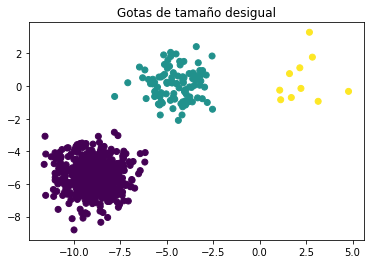

In [171]:
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot()
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Gotas de tamaño desigual")

plt.show()

#Actividad 8:

Implemente el paso E del algoritmo Expectation-Maximization:

$\gamma_{nk}=\frac{\pi_k\mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum\limits_{j=1}^K{\pi_j\mathcal{N}(x_n|\mu_j,\Sigma_j)}}$

In [158]:
from scipy.stats import multivariate_normal
def E_step(X,pi,mu,Sigma):
  #X.shape = N,D
  #pi.shape = K
  #mu.shape = K,D
  #Sigma.shape = K,D,D #Sigma[k]
  
  #G.shape = N,K

  G = np.ones((X.shape[0], pi.shape[0]))

  for k in range(pi.shape[0]):
    gauss = multivariate_normal.pdf(X, mean=mu[k], cov= Sigma[k])
    num = gauss*pi[k]
    G[:,k] = num

  den = G.sum(1)
  for n in range(X.shape[0]):
    G[n] = G[n] / den[n]    

  return G

#Actividad 9:

Implemente el paso M del algoritmo Expectation-Maximization:

$N_k=\sum\limits_{n=1}^N{\gamma_{nk}}$

$\pi_k=\frac{1}{N}\sum\limits_{n=1}^N{\gamma_{nk}}$

$\mu_k=\frac{1}{N_k}\sum\limits_{n=1}^N{\gamma_{nk}x_n}$

$\Sigma_k=\frac{1}{N_k}\sum\limits_{n=1}^N{\gamma_{nk}(x_n-\mu_k)(x_n-\mu_k)^\top}$


In [159]:
def M_step(X,G):
  #X.shape = N,D
  #G.shape = N,K

  #pi.shape = K
  #mu.shape = K,D
  #Sigma.shape = K,D,D
  NK = G.sum(0)
  N = X.shape[0]
  pi = np.ones(G.shape[1])

  for k in range(G.shape[1]):
    pi[k] = (1/N) * (NK[k]) 

  mu = np.zeros((pi.shape[0], X.shape[1]))

  for k in range(pi.shape[0]):
    num = 0
    for n in range(X.shape[0]):
      num += (G[n,k])*(X[n])
    mu[k,:] = num/NK[k] 
  Sigma = np.zeros((pi.shape[0], X.shape[1], X.shape[1]))

  num = 0
  for k in range(pi.shape[0]):
    num = 0
    for n in range(X.shape[0]):
      num += G[n,k]*np.dot((X[n] - mu[k]).reshape(-1, 1), (X[n] - mu[k]).reshape(1, -1))
    Sigma[k,:,:] = num/NK[k]

  return pi,mu,Sigma

#Actividad 10:

Complete la función `gmm_update` que:

  1. Calcula $\gamma_{nk}$ con $\pi_k$,$\mu_k$, y $\Sigma_k$
  2. Calcula $\pi_k$,$\mu_k$, y $\Sigma_k$ con $\gamma_{nk}$
  3. Retorna $\pi_k$,$\mu_k$, $\Sigma_k$ y $\gamma_{nk}$ actualizados

Use sus implementaciones `E_step` y `M_step`


In [160]:
def gmm_update(X,pi,mu,Sigma):
  #X.shape = (N,D)
    
  G = E_step(X, pi, mu, Sigma)
  pi,mu,Sigma = M_step(X, G)
  
  return pi,mu,Sigma,G

#Actividad 11:

Implemente el algoritmo EM para GMM:

1. Inicializar $\pi_k$,$\mu_k$ y $\Sigma_k$.
2. Actualizar el modelo usando `gmm_update` durante `max_iter` iteraciones.
4. Retornar $\pi_k$,$\mu_k$, $\Sigma_k$ y $\gamma_{nk}$.

In [161]:
def gmm(X,K=2,max_iter=100):

  pi = np.ones((K,))/K
  #G = np.random.uniform(size=(X.shape[0],K))
  mu = X[np.random.permutation(X.shape[0])[:K]]
  Sigma = np.array([np.eye(X.shape[1])]*K)
  #pi = np.random.uniform(size=(K,))

  for iter in range(max_iter):
    pi,mu,Sigma,G = gmm_update(X,pi,mu,Sigma)

  return pi,mu,Sigma,G

gmm(X,K=3,max_iter=100)

(array([0.18045135, 0.4803013 , 0.33924734]),
 array([[-3.90338651,  0.08885097],
        [-9.06886911, -5.15235836],
        [-8.76125578, -5.94810131]]),
 array([[[ 4.89963889,  0.23884293],
         [ 0.23884293,  0.97523851]],
 
        [[ 1.09460981, -0.02565671],
         [-0.02565671,  0.74080175]],
 
        [[ 0.89218805,  0.17295994],
         [ 0.17295994,  0.85024693]]]),
 array([[3.46745260e-14, 1.33442237e-01, 8.66557763e-01],
        [1.00745829e-08, 7.62096286e-01, 2.37903704e-01],
        [4.63905271e-06, 9.89002265e-01, 1.09930962e-02],
        ...,
        [1.00000000e+00, 1.34269152e-31, 2.46500658e-31],
        [1.00000000e+00, 8.31707091e-33, 6.09982686e-34],
        [1.00000000e+00, 9.72497200e-28, 7.38546109e-28]]))

#Actividad 12:

*   Ejecute el siguiente bloque que emplea su implementación para agrupar las bases de datos del laboratorio.
*   Cambie el número de grupos 
*   Identifique las ventajas del algoritmo sobre k-means.



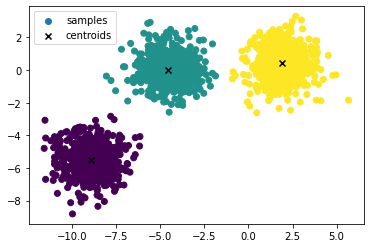

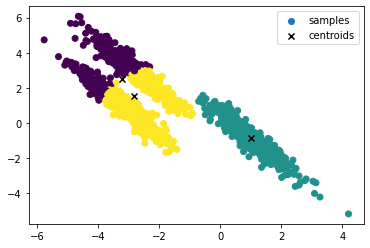

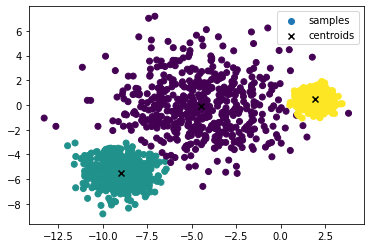

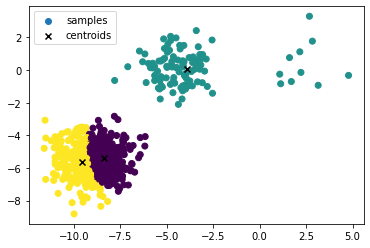

In [162]:
for X in datasets:
  
  pi,mu,Sigma,G = gmm(X,K=3,max_iter=100)

  plt.scatter(X[:,0],X[:,1],c=np.argmax(G,1),label='samples')
  plt.scatter(mu[:,0],mu[:,1],c='k',marker='x',label='centroids')
  plt.legend()
  plt.show()

#Actividad 13:

* Consulte cómo usar el módulo de mezclas de gaussianas de scikit-learn
(`sklearn.mixture.GaussianMixture`).

* Repita la Actividad 12 empleando la implementación de sklearn.


Text(0.5, 1.0, 'Número incorrecto de manchas')

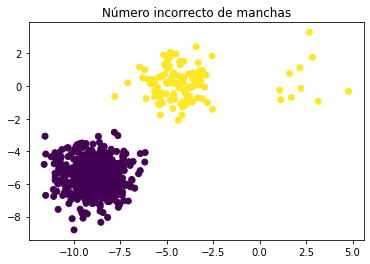

In [164]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=2, random_state=random_state).fit_predict(X)

plt.subplot()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Número incorrecto de manchas")

Text(0.5, 1.0, 'Gotas distribuidas de forma anisotrópica')

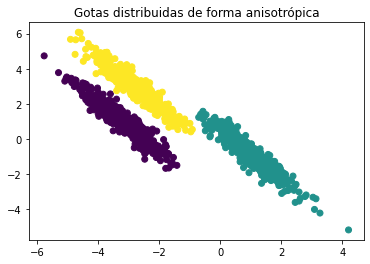

In [165]:
y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot()
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Gotas distribuidas de forma anisotrópica")

Text(0.5, 1.0, 'Unequal Variance')

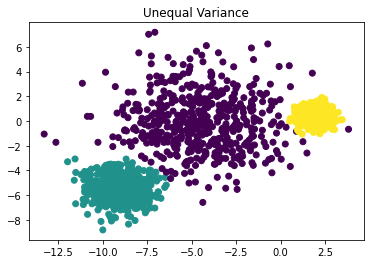

In [169]:
y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_varied)

plt.subplot()
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Varianza desigual")


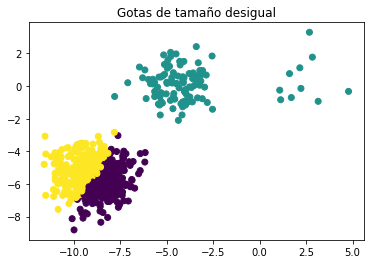

In [170]:
y_pred = GaussianMixture(n_components=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot()
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Gotas de tamaño desigual")

plt.show()